In [20]:
import lib_analysis
import gin
import lib_biased_mnist

%load_ext autoreload
%autoreload 2

In [4]:
gin.enter_interactive_mode()

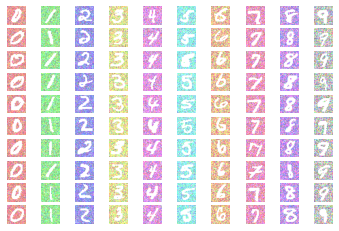

In [61]:
gin.bind_parameter('BiasedMnistProblem.filter_for_digits', list(range(10)))
gin.bind_parameter('BiasedMnistProblem.training_data_label_correlation', 1)
gin.bind_parameter('BiasedMnistProblem.background_noise_level', 200) 

D_train = lib_biased_mnist.BiasedMnistProblem().generate_training_data()
X, y = next(D_train.batch(10_000).as_numpy_iterator())
lib_analysis.plot_digit_grid(X, y)